In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [5]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')
june_over_perc = ts((june_over$series/june_over$total), frequency=24)
june_under_perc = ts((june_under$series/june_under$total), frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [6]:
jo = ts(june_over$series[33:(24*30-16)], frequency=24)
ju = ts(june_under$series[33:(24*30-16)], frequency=24)

In [7]:
jo = ts(june_over_perc[33:(24*30-16)], frequency=24)
ju = ts(june_under_perc[33:(24*30-16)], frequency=24)

In [8]:
june = june_ts()

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [9]:
total = june_under$total[33:(24*30-16)]

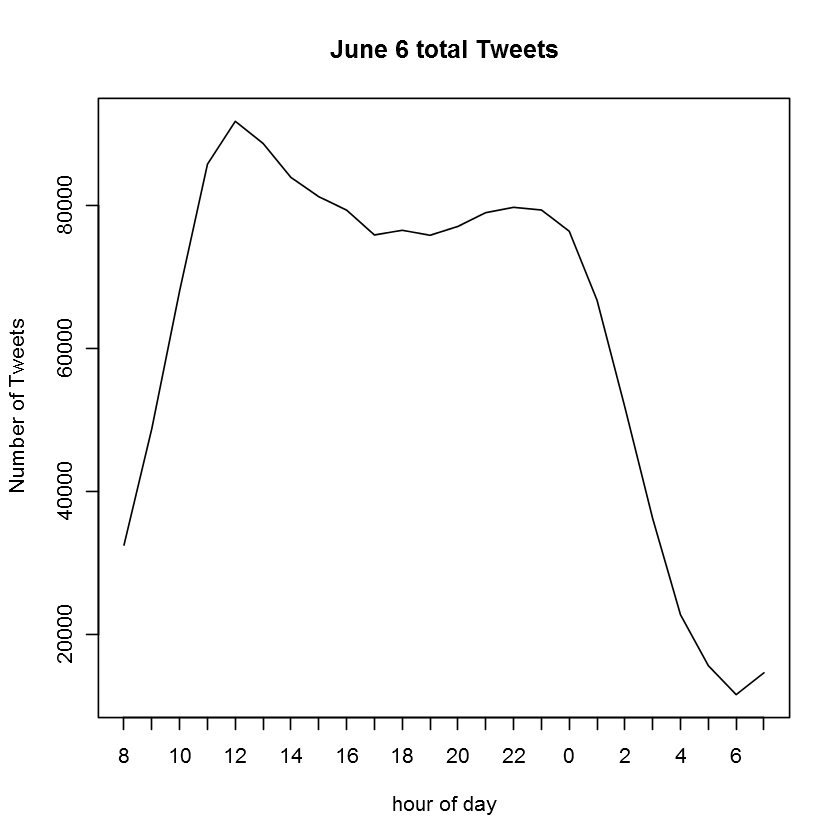

In [10]:
start = 24*24
plot.ts(total[(start):(start+23)], xaxt='n', xlab='hour of day', ylab='Number of Tweets', main='June 6 total Tweets')
axis(1, at=c(1:24), labels=c(c(8:23), c(0:7)))

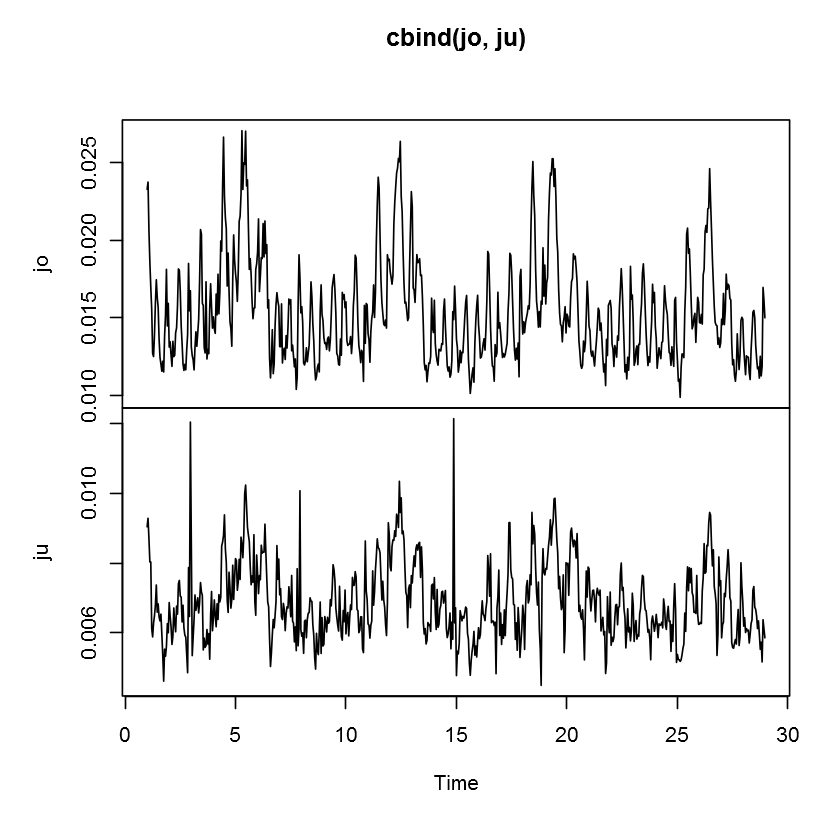

In [11]:
plot.ts(cbind(jo, ju))

Breakdown by day of week:

In [12]:
j_by_weekday = day_of_week(c(as.vector(jo), as.vector(ju)))

In [13]:
weekdays = c('Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday')

Percent tweets by day

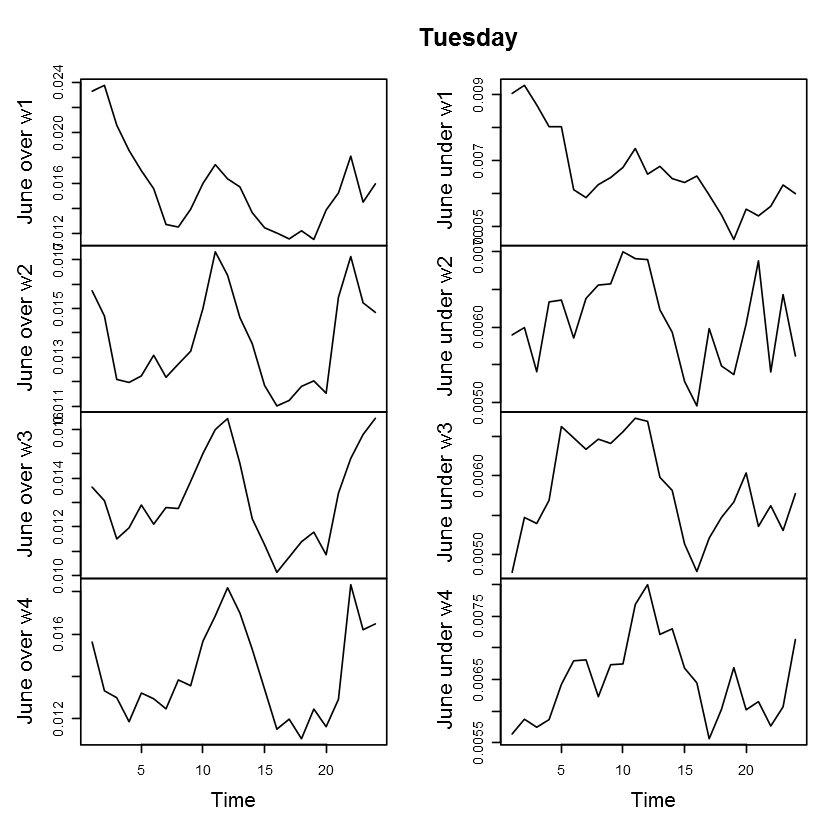

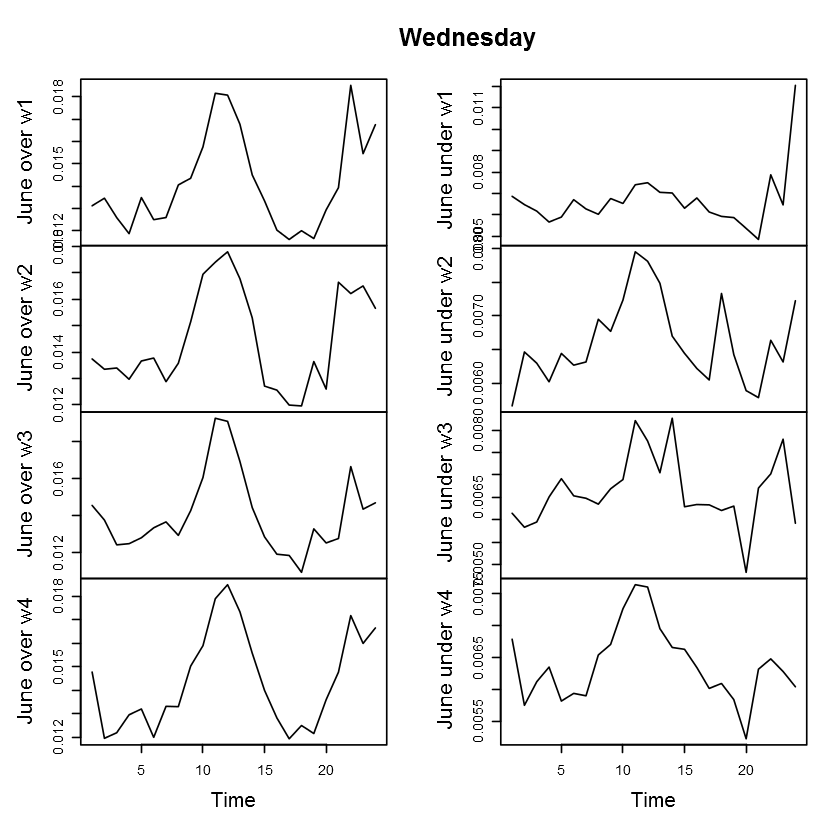

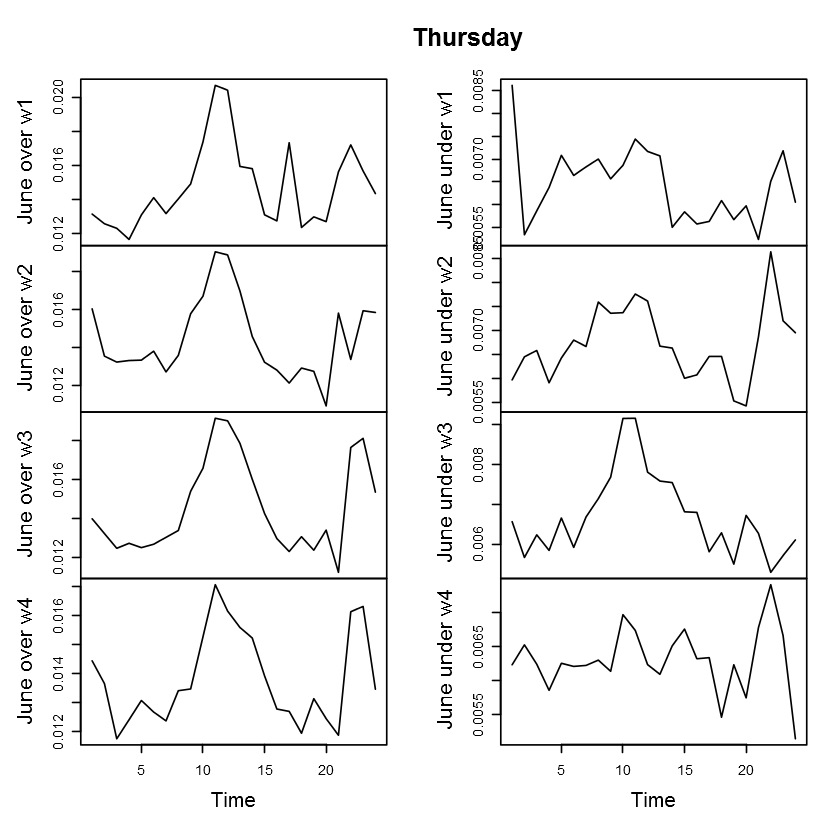

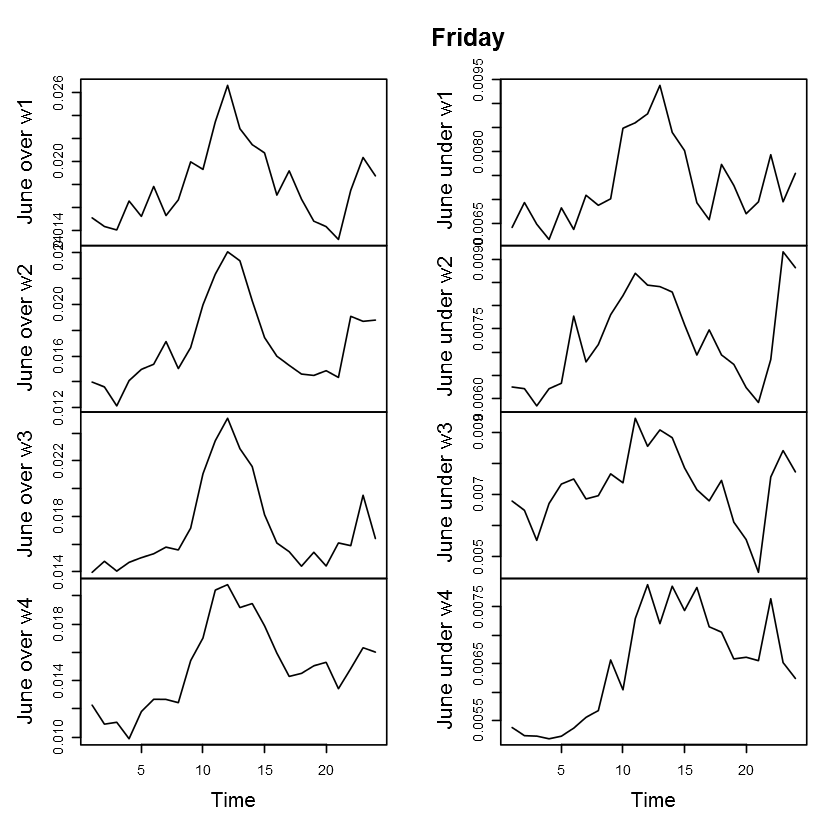

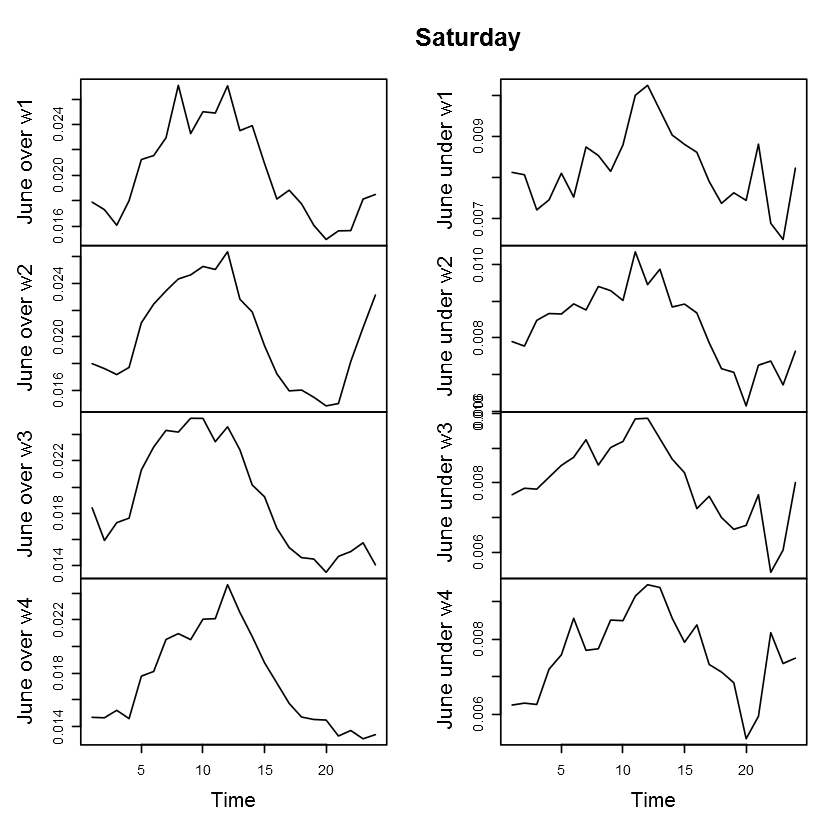

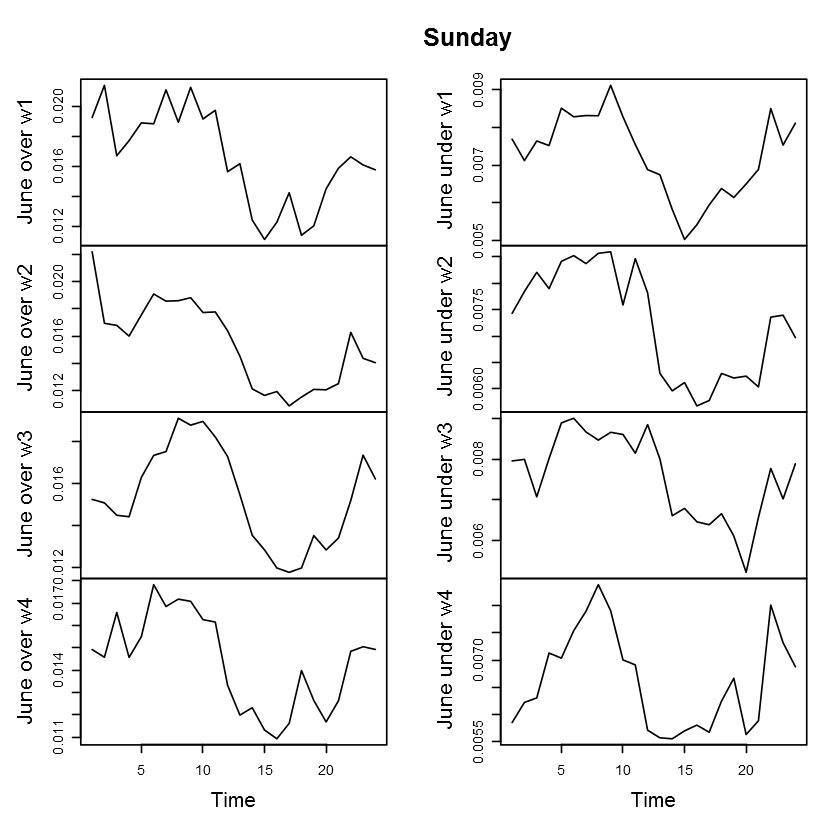

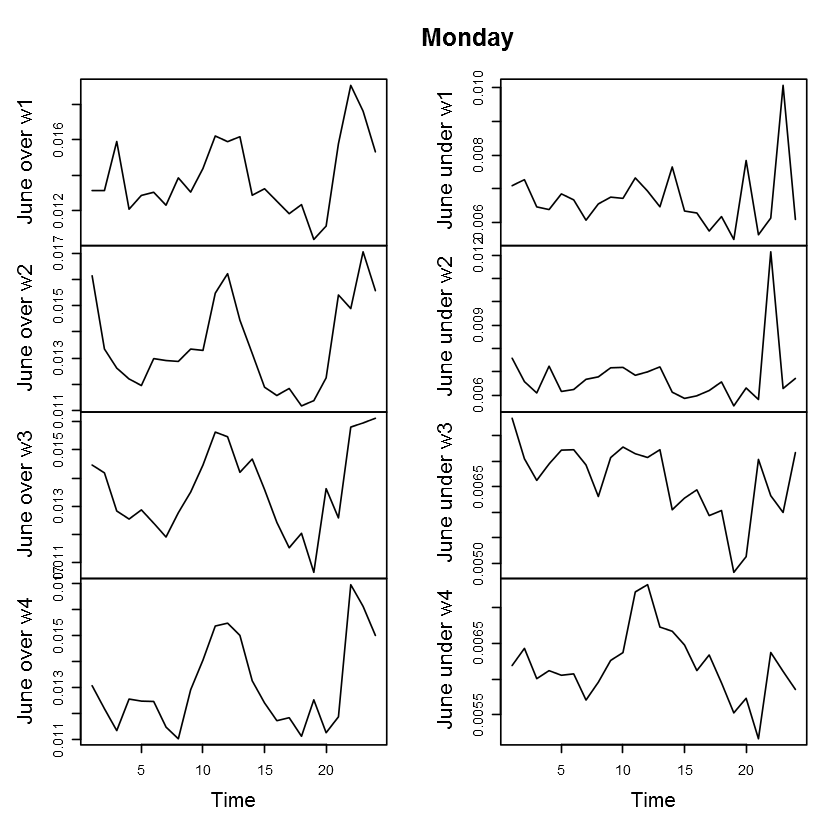

In [14]:
for (weekday in 1:7){
    over_month = data.frame(j_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}

Absolute tweets grouped by day of week, overage vs underage

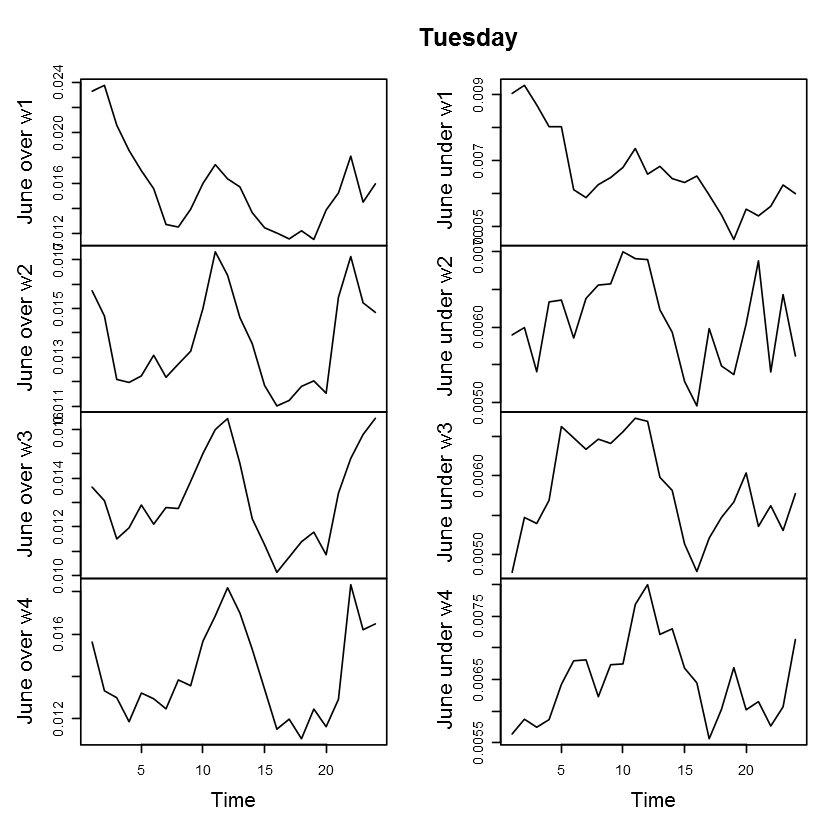

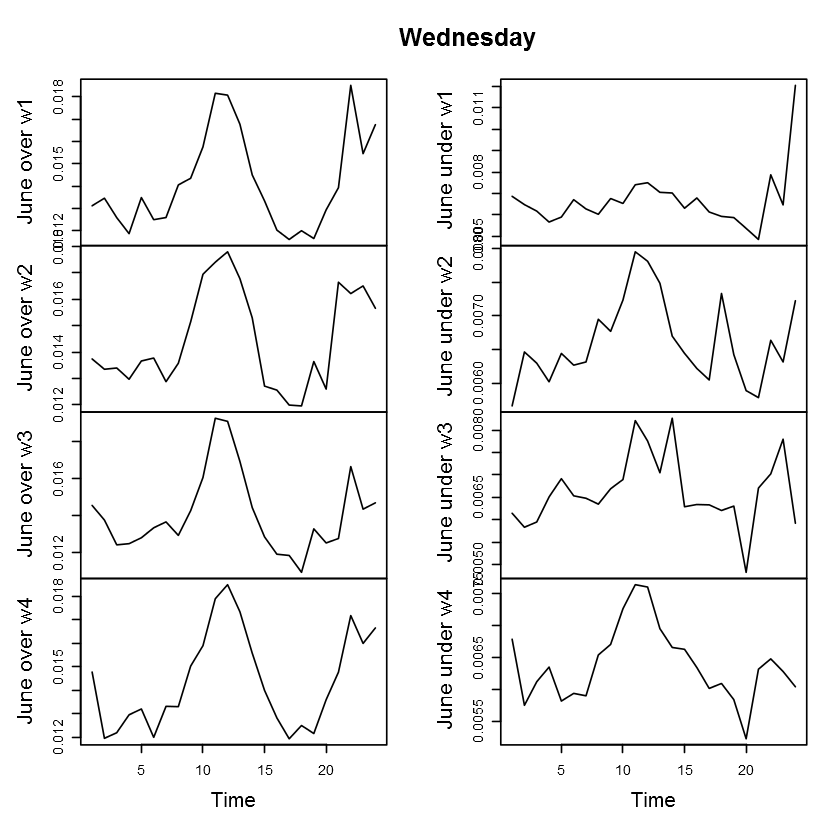

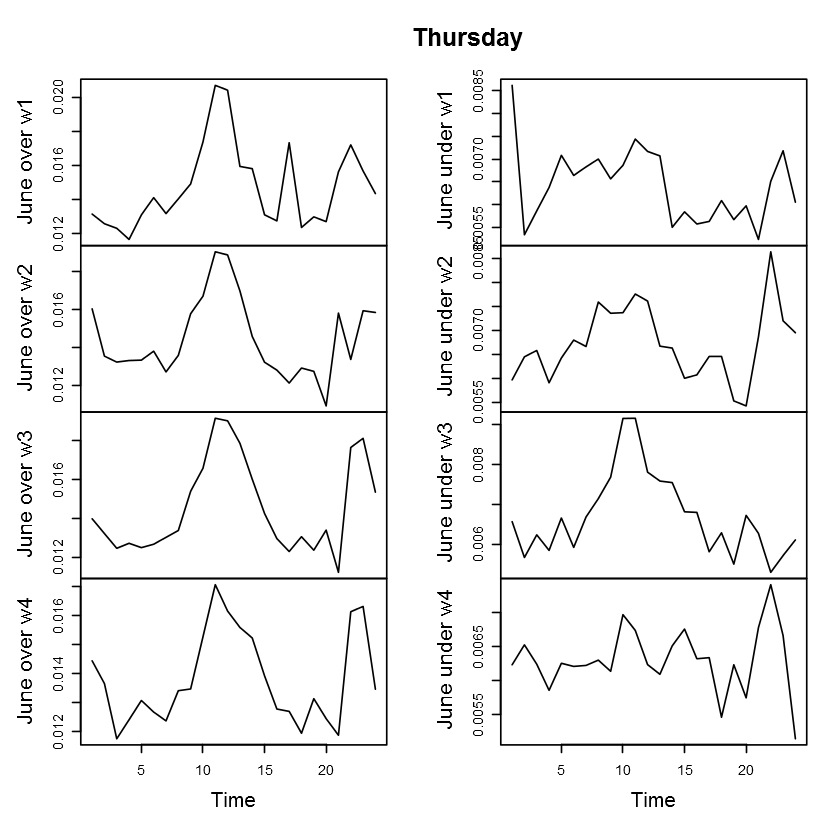

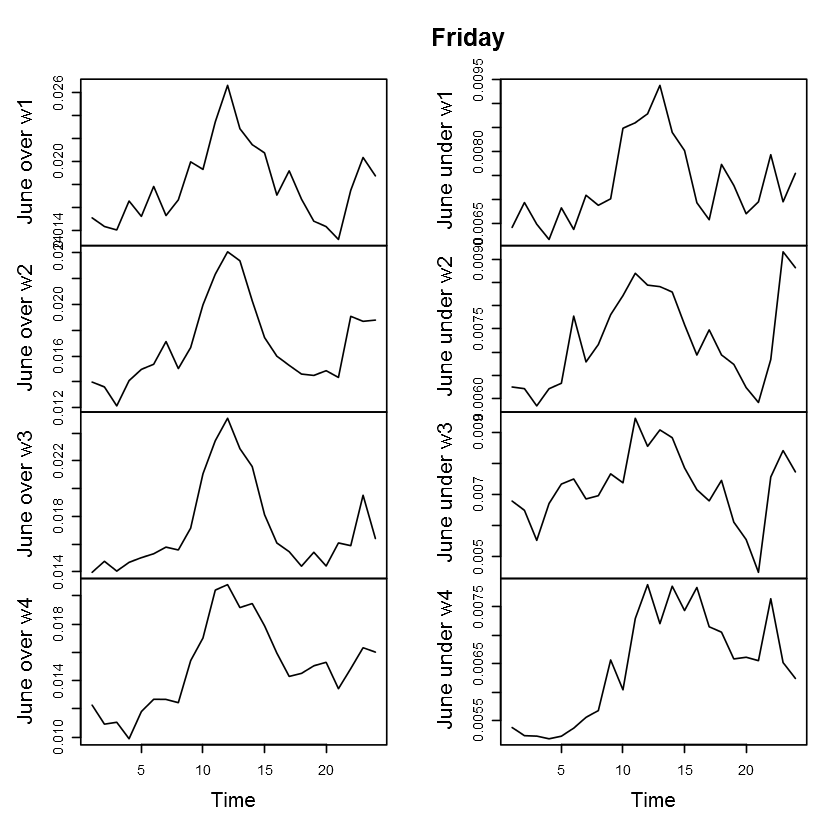

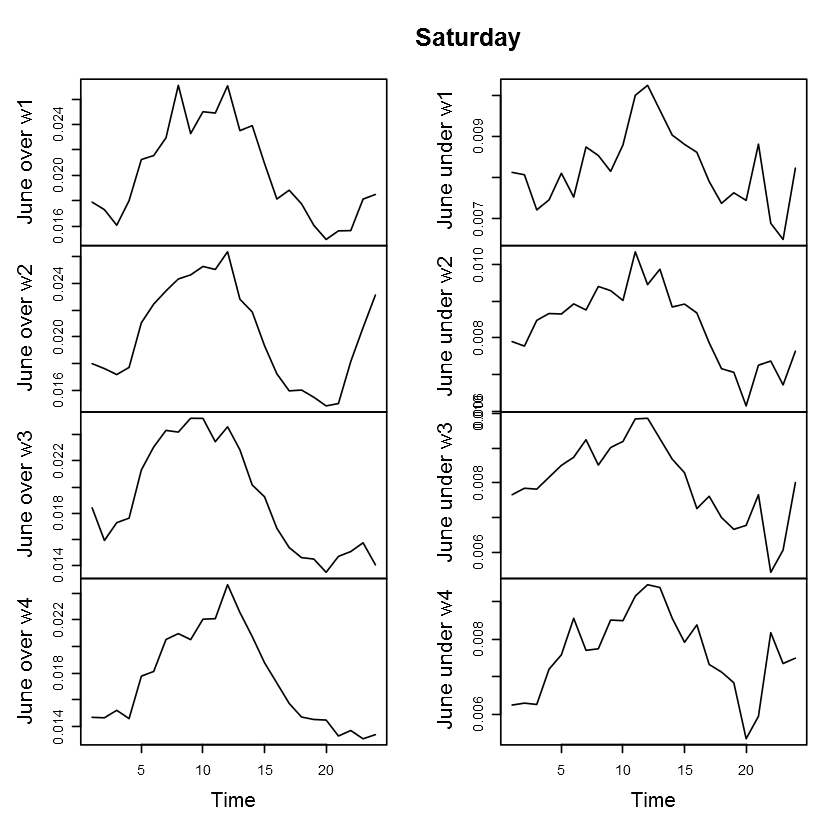

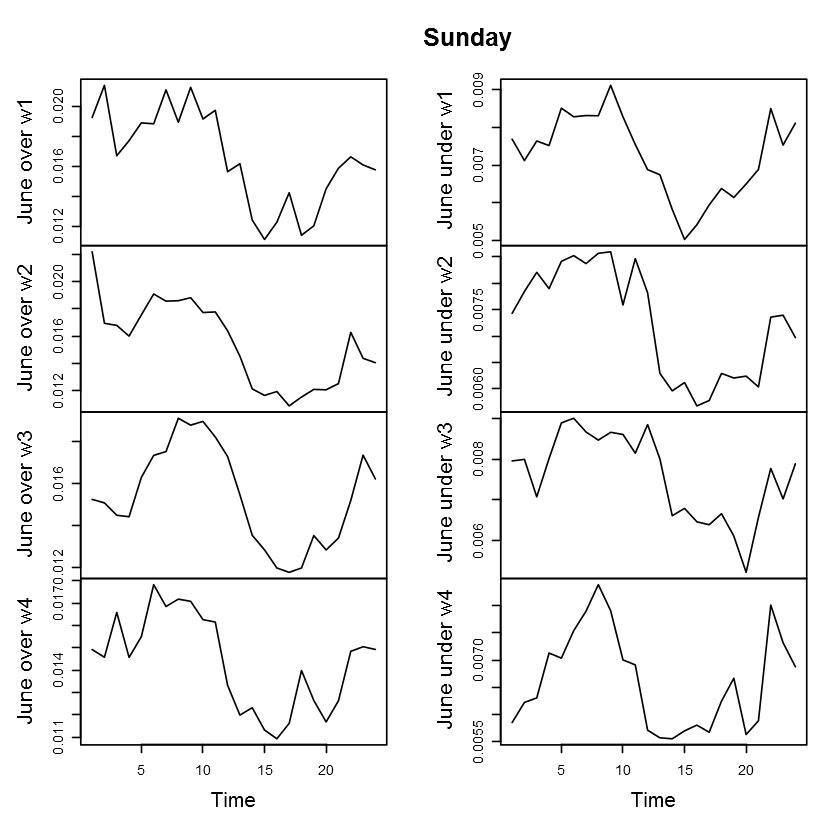

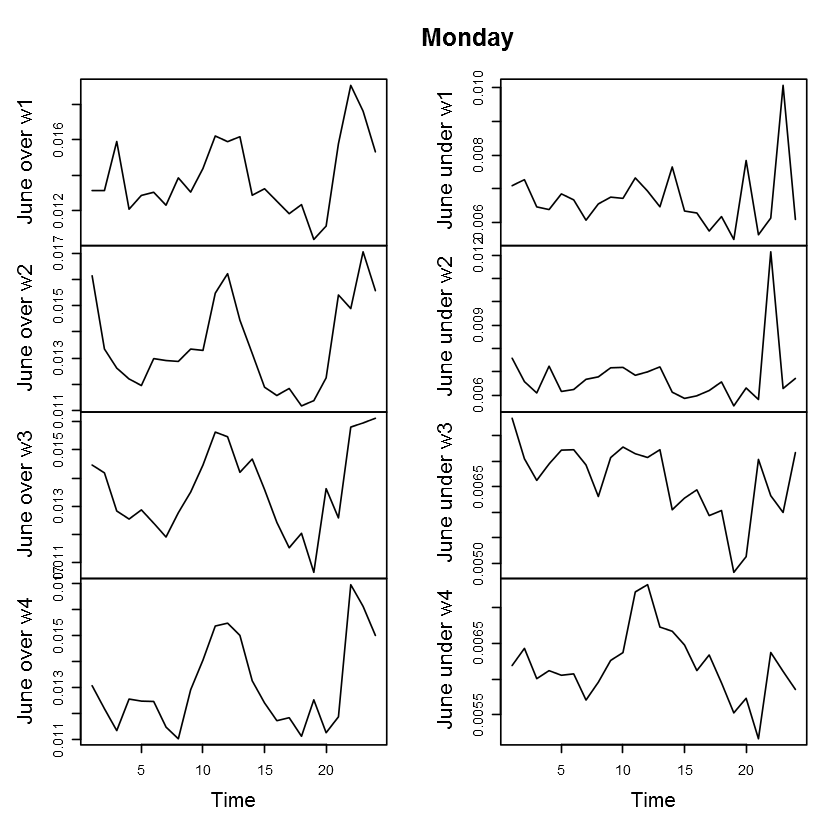

In [15]:
for (weekday in 1:7){
    over_month = data.frame(j_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}

In [16]:
jo_weekday = day_of_week(as.vector(jo))
ju_weekday = day_of_week(as.vector(ju))

In [17]:
june_weekday = day_of_week(as.vector(june))
june_avg_day = apply(june_weekday, 1, rowMeans)
colnames(june_avg_day) = weekdays

In [18]:
jo_avg_day = apply(jo_weekday, 1, rowMeans)
colnames(jo_avg_day) = weekdays

In [19]:
ju_avg_day = apply(ju_weekday, 1, rowMeans)
colnames(ju_avg_day) = weekdays

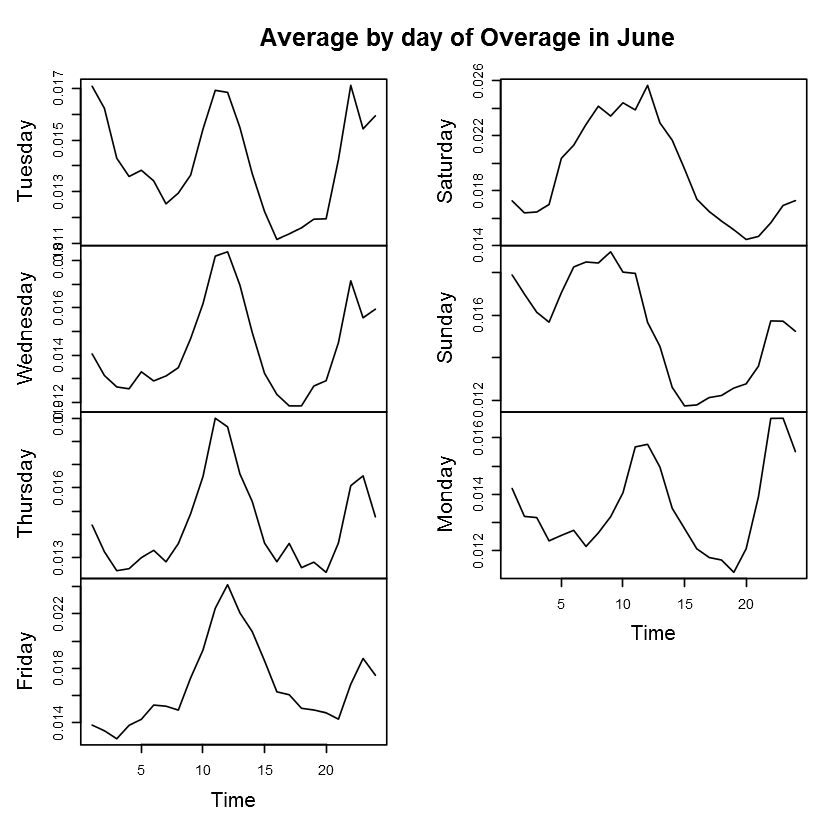

In [18]:
plot.ts(jo_avg_day, main='Average by day of Overage in June')

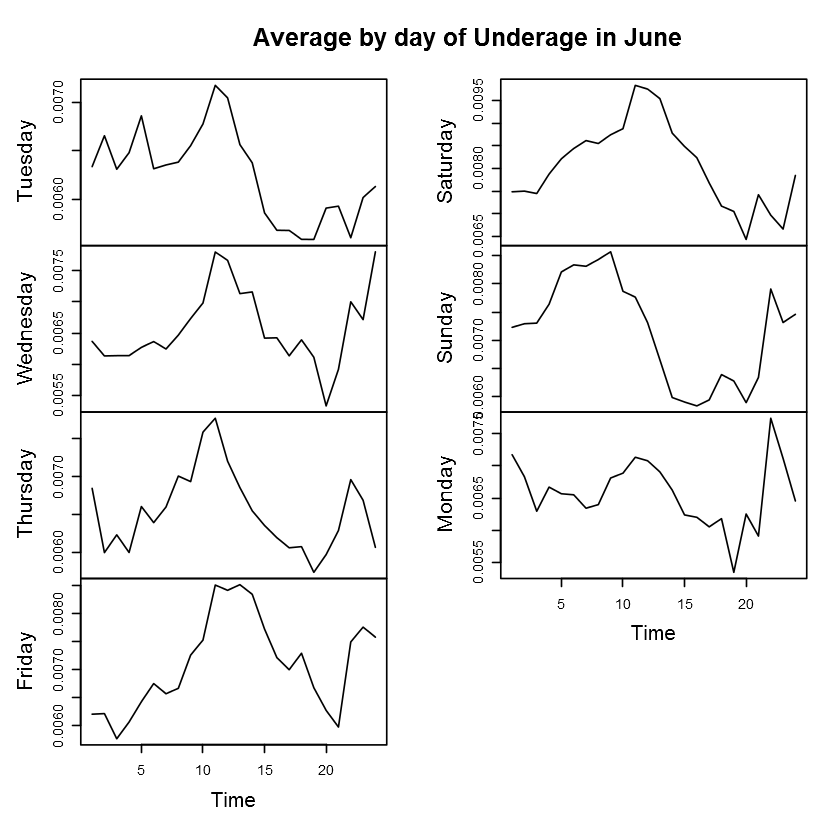

In [20]:
plot.ts(ju_avg_day, main='Average by day of Underage in June')

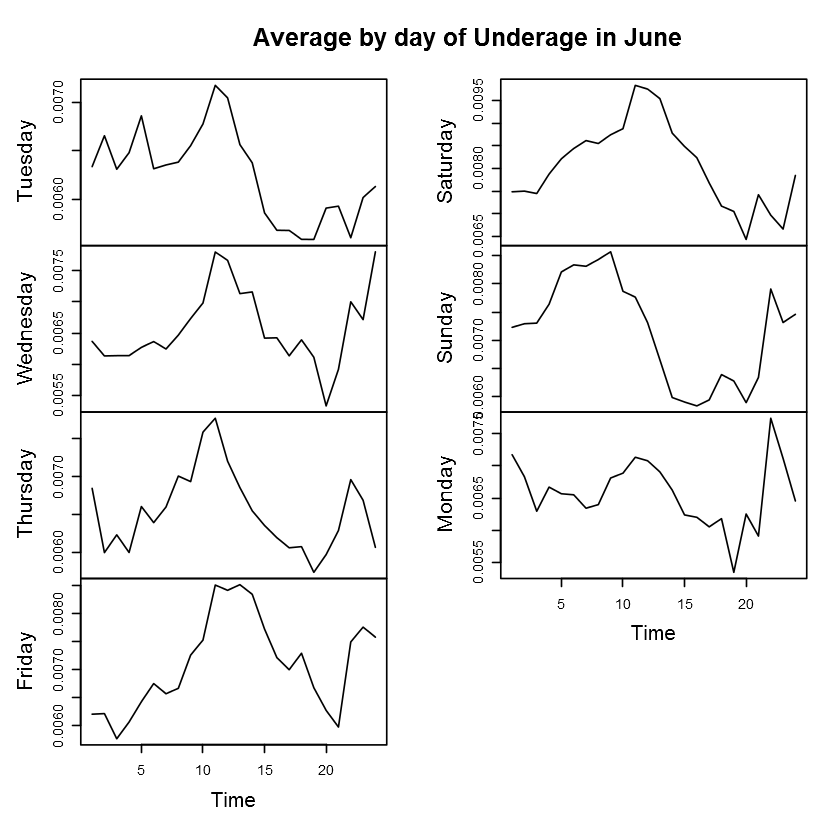

In [21]:
plot.ts(ju_avg_day, main='Average by day of Underage in June')

In [20]:
library(TSclust)

Loading required package: pdc
Loading required package: cluster


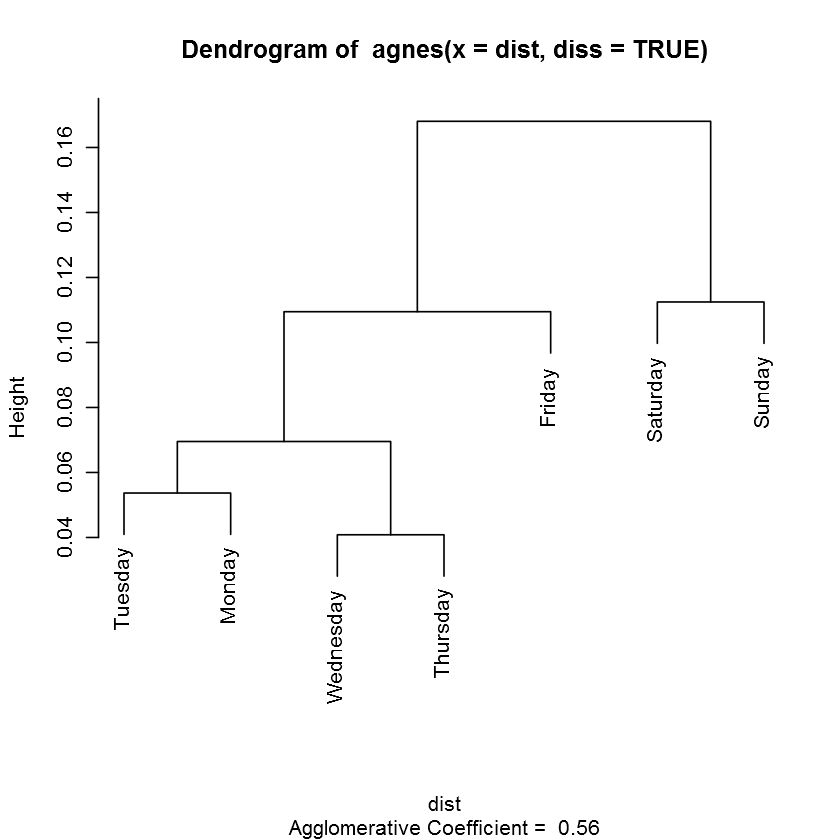

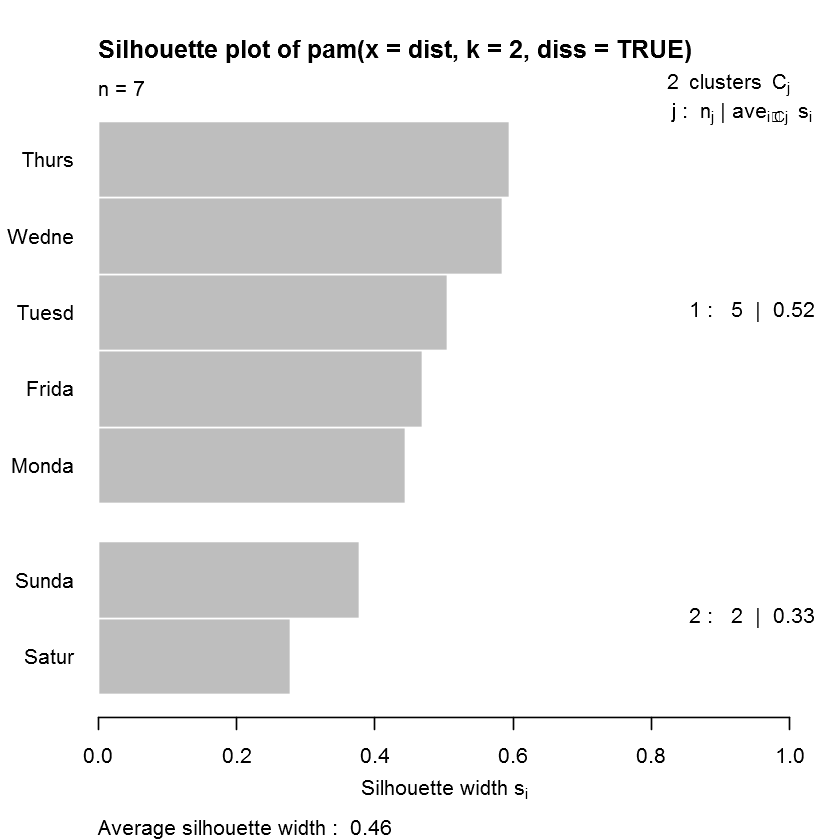

In [68]:
dist = diss(t(normed_j_day), METHOD='EUC')
clust(dist)

In [21]:
normed_j_day = (apply(june_avg_day, FUN=normalize, MARGIN=2))
colnames(normed_j_day)=weekdays

In [22]:
apply(normed_j_day, FUN=function(x){return(norm(x, type='2'))}, MARGIN=2)

Tuesday Wednesday  Thursday    Friday  Saturday    Sunday    Monday 
        1         1         1         1         1         1         1

In [25]:
require(factoextra)

Loading required package: factoextra
Loading required package: ggplot2


In [30]:
weekdays <- c('Tu', 'W', 'Th','F', 'Sa', 'Su', 'M')

png 
  2

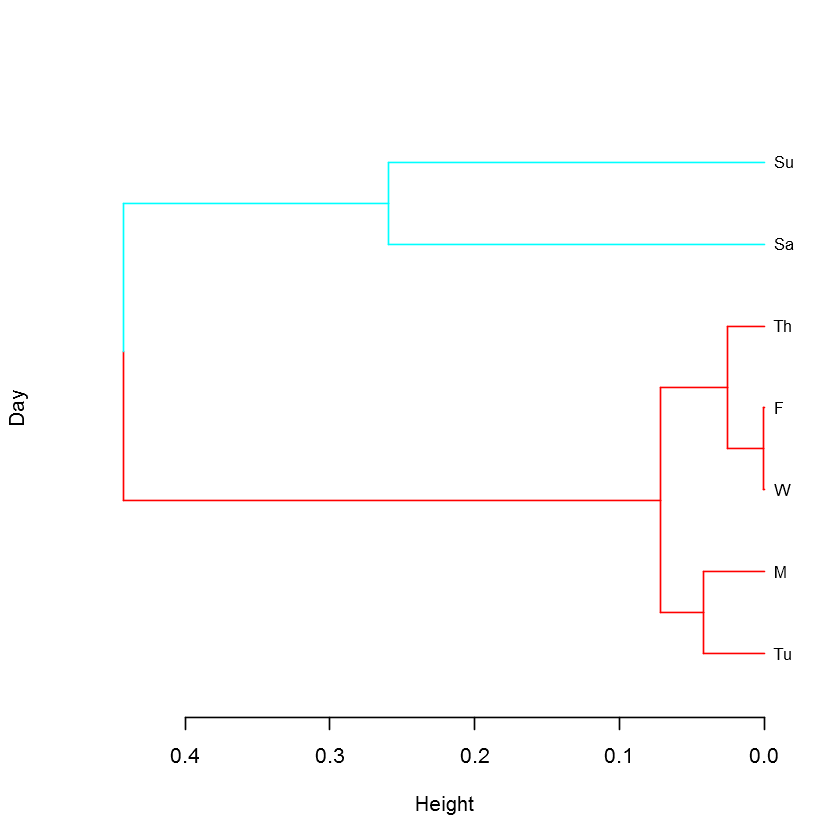

In [35]:
dist = dissimilarity(normed_j_day, phase_dist(1))
colnames(dist)=weekdays
rownames(dist)=weekdays
a=agnes(dist)
png(filename='c:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/age-day-phase.png')
fviz_dend(a,  main='', ylab='Day', xlab='Height', k=2, horiz=TRUE)
dev.off()
fviz_dend(a,  main='', ylab='Day', xlab='Height', k=2, horiz=TRUE)

  Tuesday Wednesday  Thursday    Friday  Saturday    Sunday    Monday 
        1         1         1         1         2         2         1 


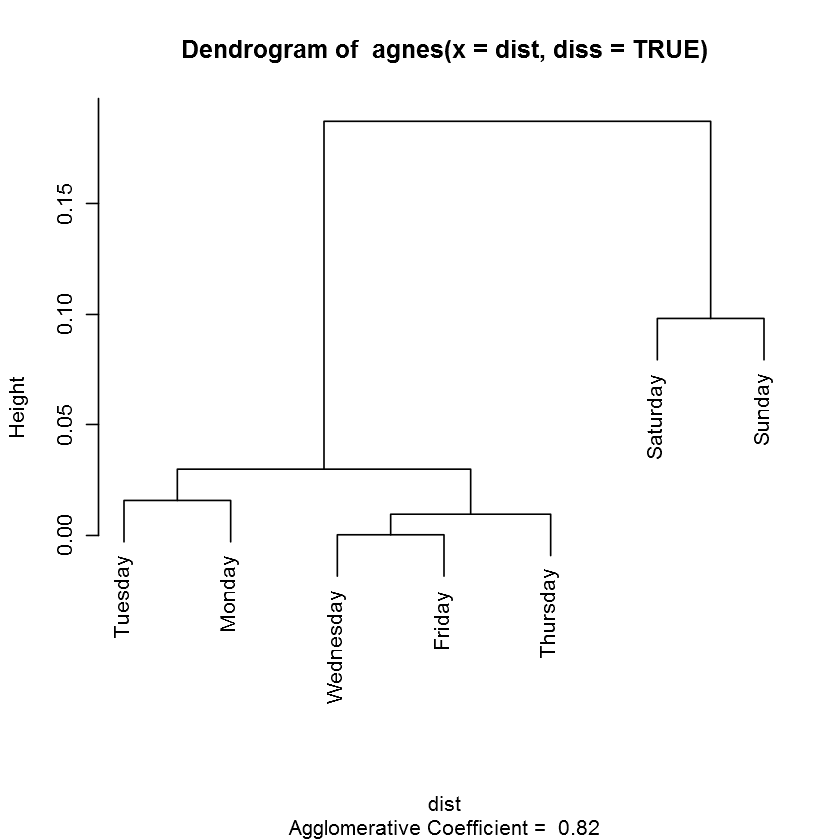

Medoids:
     ID            
[1,] "3" "Thursday"
[2,] "6" "Sunday"  
Clustering vector:
  Tuesday Wednesday  Thursday    Friday  Saturday    Sunday    Monday 
        1         1         1         1         2         2         1 
Objective function:
     build       swap 
0.02477239 0.02343208 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

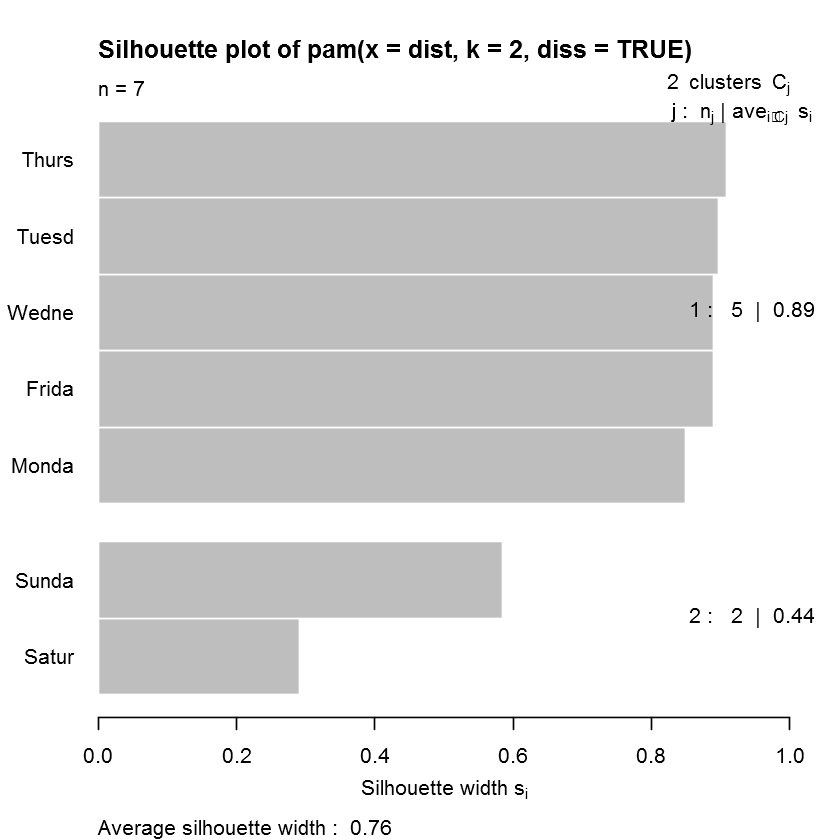

In [23]:
dist = dissimilarity(normed_j_day, phase_dist(1))
colnames(dist)=weekdays
rownames(dist)=weekdays
clust(dist)

In [70]:

plot_age_day_clust <- function(){
    par(mfrow=c(2,1))
    dist = dissimilarity(normed_j_day, phase_dist(1))
colnames(dist)=weekdays
rownames(dist)=weekdays
clust(dist)
}
save_png(plot_age_day_clust, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/age-day-phase.png')

png 
  2

In [64]:
normed_j_day

Tuesday Wednesday  Thursday    Friday  Saturday    Sunday    Monday
 [1,] 0.1605849 0.1618901 0.1504243 0.1194617 0.1367022 0.1631306 0.1788999
 [2,] 0.1571599 0.1563266 0.1412974 0.1245724 0.1459541 0.1629069 0.1645671
 [3,] 0.1403806 0.1527205 0.1412862 0.1266876 0.1381043 0.1785580 0.1645260
 [4,] 0.1789517 0.1679188 0.1598323 0.1324266 0.1560284 0.1912782 0.1752436
 [5,] 0.1895405 0.1668504 0.1597060 0.1441307 0.1929775 0.2185092 0.1773890
 [6,] 0.1816381 0.1775034 0.1668951 0.1535666 0.2206003 0.2361518 0.1937456
 [7,] 0.1691961 0.1739147 0.1682148 0.1632934 0.2329494 0.2362721 0.1760090
 [8,] 0.1832316 0.1748295 0.1767924 0.1649404 0.2364298 0.2391320 0.1811346
 [9,] 0.1952572 0.1911125 0.1960959 0.1927095 0.2392308 0.2438034 0.1946181
[10,] 0.2246123 0.2222374 0.2344897 0.2263603 0.2445002 0.2416049 0.2118737
[11,] 0.2512425 0.2592593 0.2587069 0.2657303 0.2520357 0.2363931 0.2338557
[12,] 0.2408848 0.2582957 0.2439658 0.2776290 0.2468890 0.2185429 0.2331870
[13,] 0.2248910 0.2431813 0.2425429 0.2591973 0.2328875 0.2007086 0.2188874
[14,] 0.2034745 0.2227892 0.2317958 0.2543988 0.2288526 0.1881723 0.2166424
[15,] 0.2010426 0.2072450 0.2092486 0.2282466 0.2186511 0.1856691 0.2032959
[16,] 0.2002301 0.2115680 0.2086299 0.2208712 0.2123554 0.1799082 0.2085412
[17,] 0.2020910 0.2159775 0.2140509 0.2179286 0.1988724 0.1837628 0.2153926
[18,] 0.2326279 0.2155796 0.2210004 0.2235413 0.2052181 0.1974006 0.2262475
[19,] 0.2362989 0.2268548 0.2356214 0.2267107 0.2079614 0.2190523 0.2266554
[20,] 0.2405599 0.2386563 0.2539313 0.2297436 0.2012678 0.2101588 0.2349327
[21,] 0.2422465 0.2426045 0.2509891 0.2378852 0.2034139 0.1986128 0.2407693
[22,] 0.2202076 0.1985095 0.2005064 0.2193458 0.1660909 0.1918763 0.2345343
[23,] 0.1961338 0.1810473 0.1781707 0.1864585 0.1606519 0.1725801 0.1861323
[24,] 0.1736241 0.1695997 0.1721386 0.1686313 0.1390253 0.1641178 0.1645454

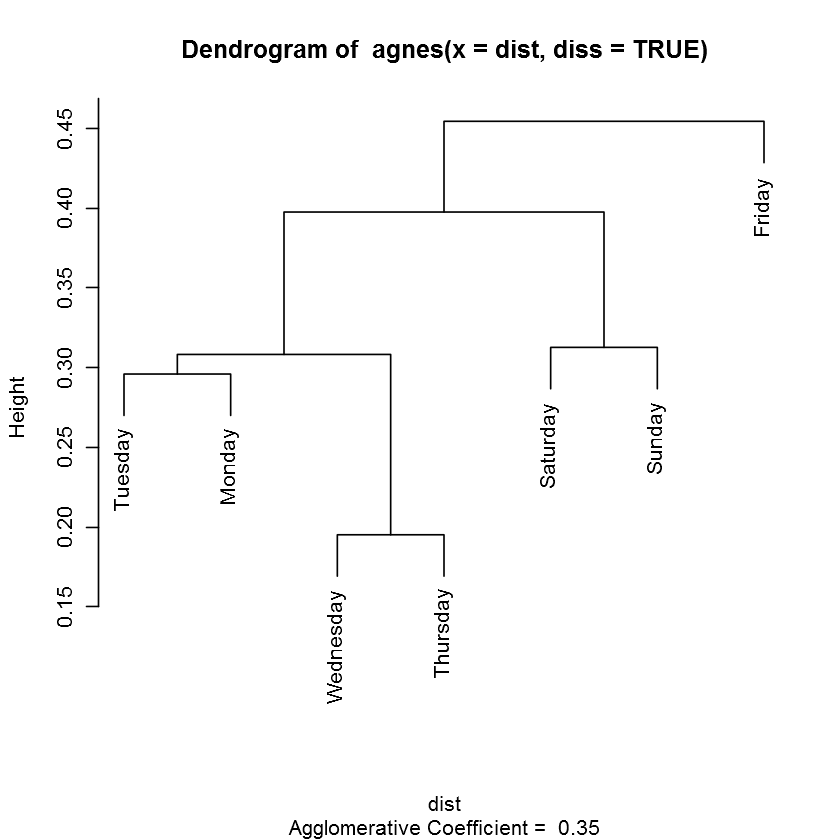

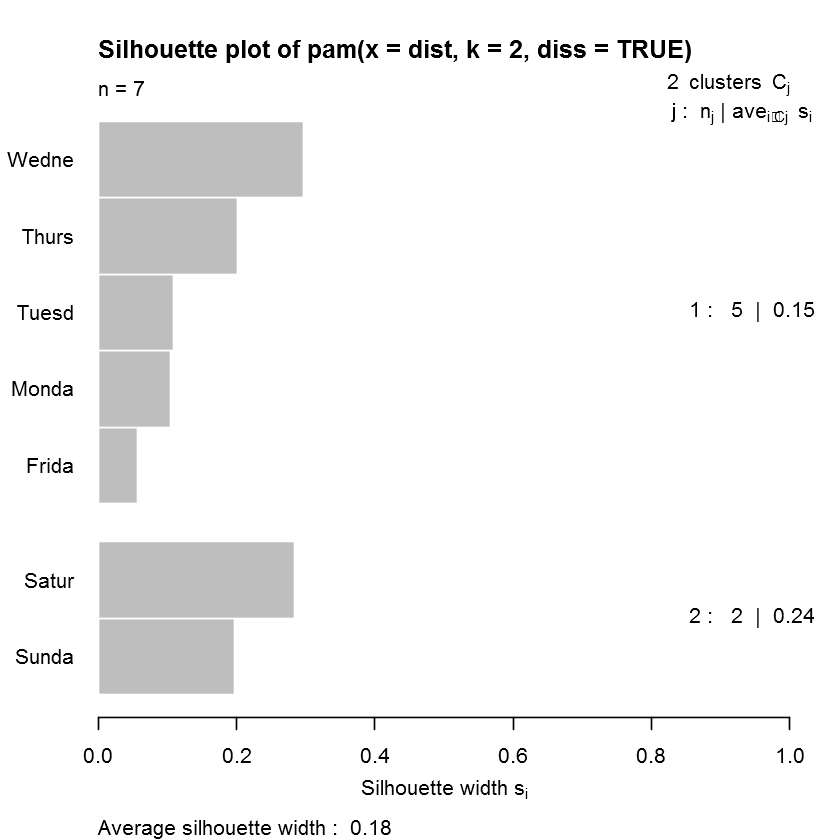

In [62]:
dist = diss(t(normed_j_day), METHOD='DTW')
clust(dist)

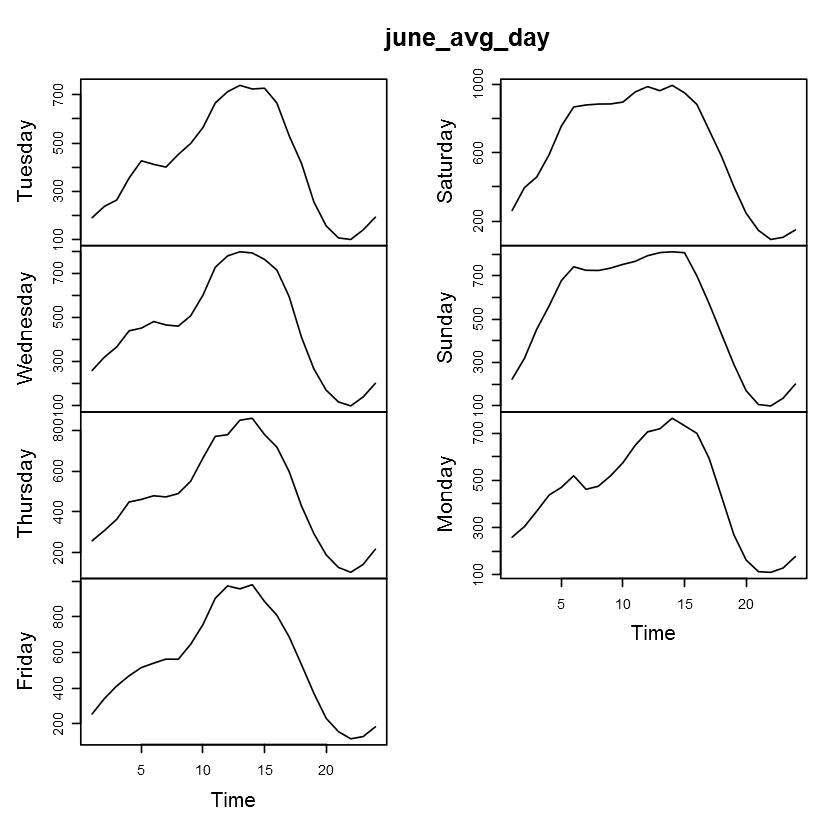

In [106]:
plot.ts(june_avg_day)

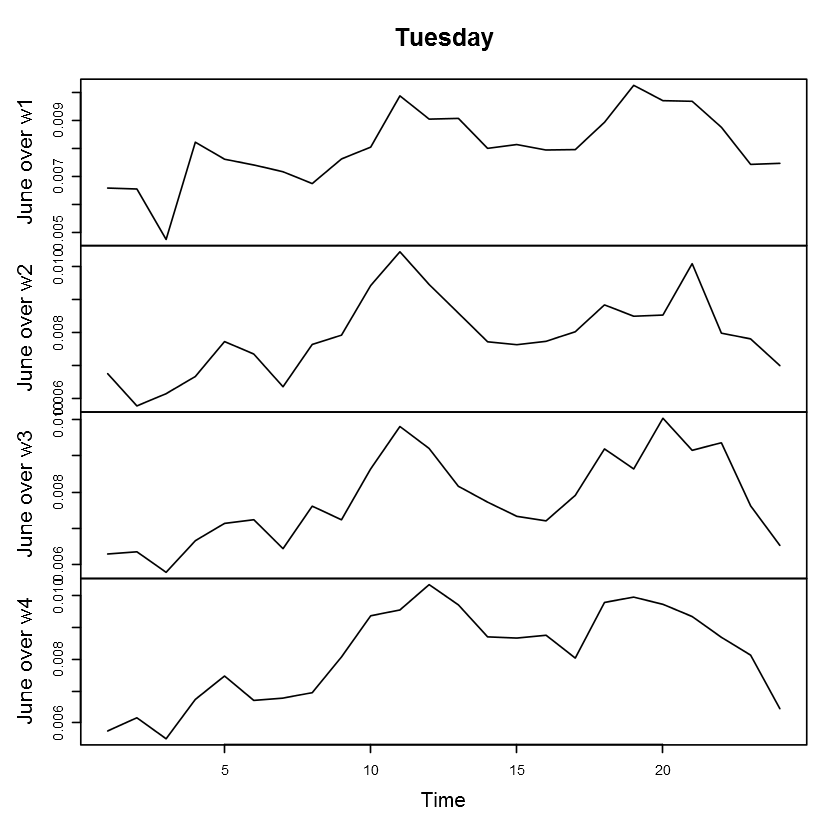

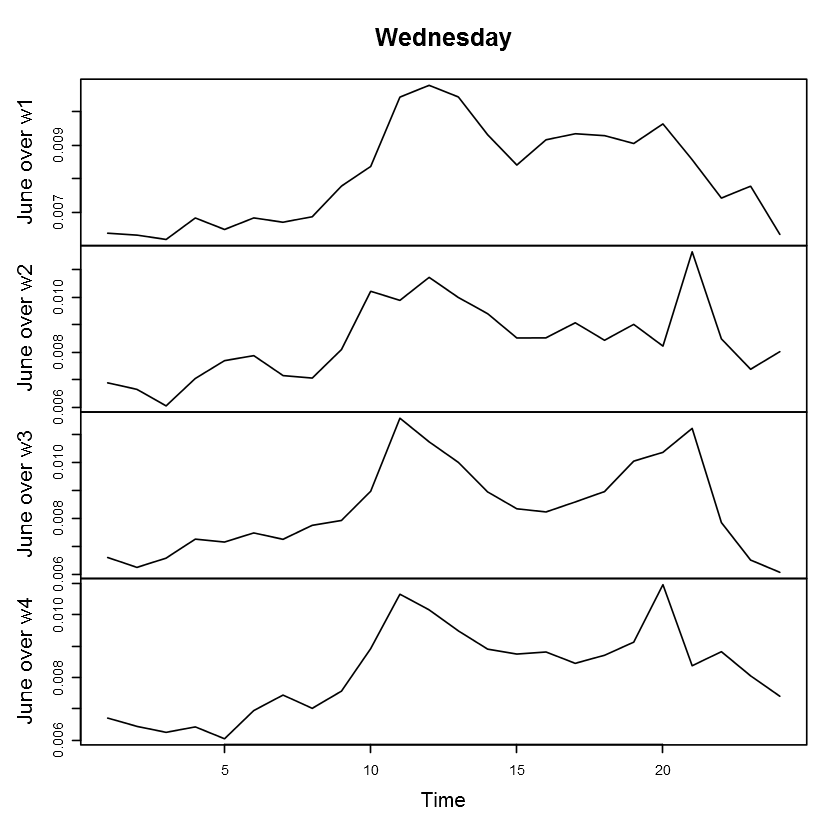

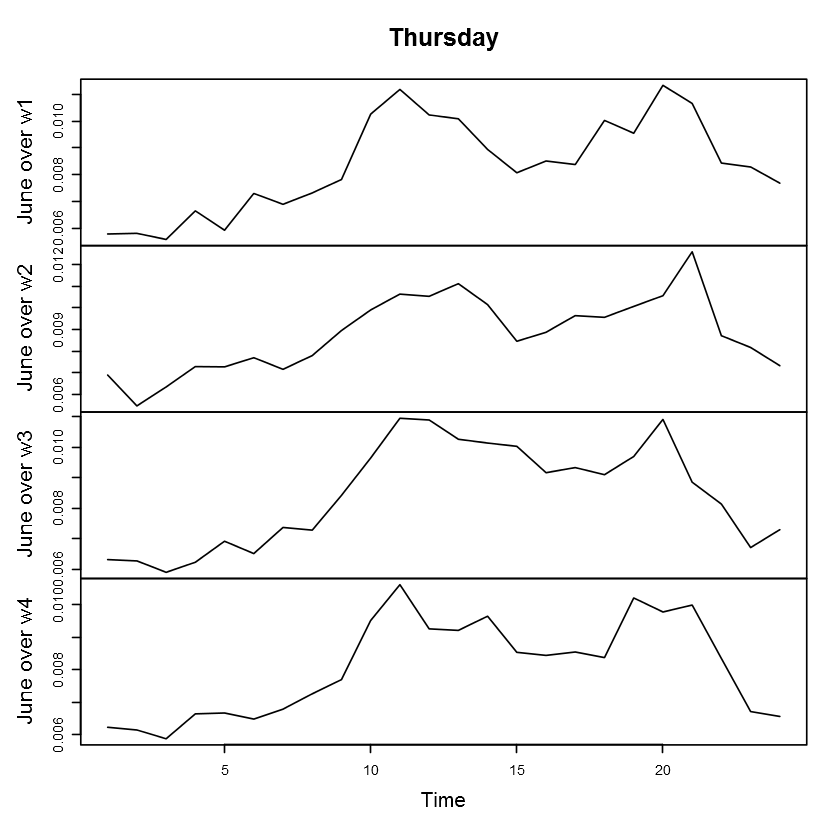

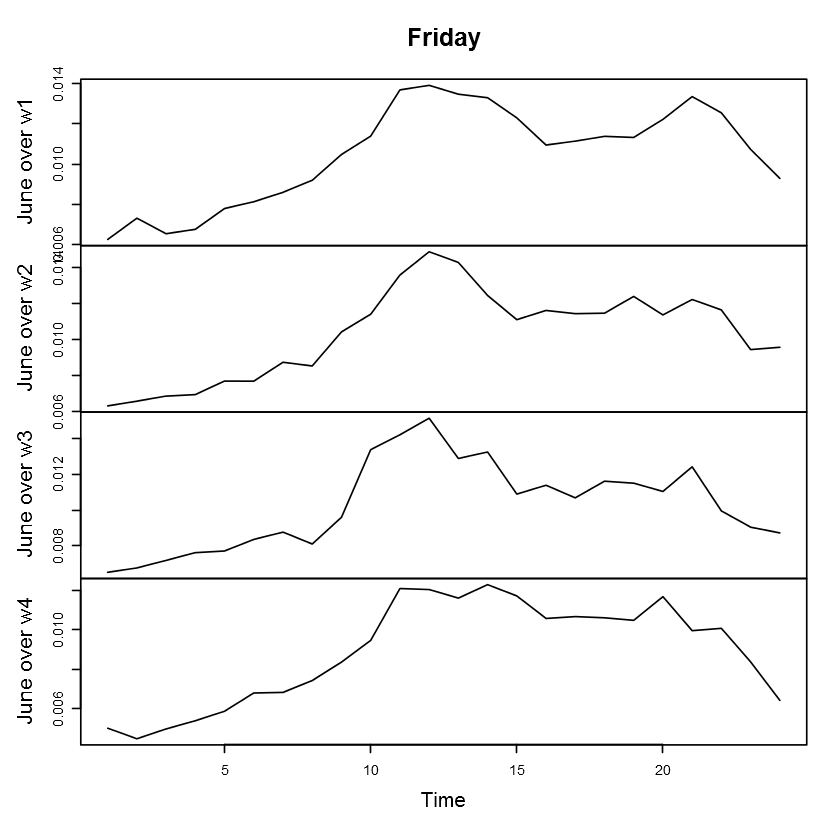

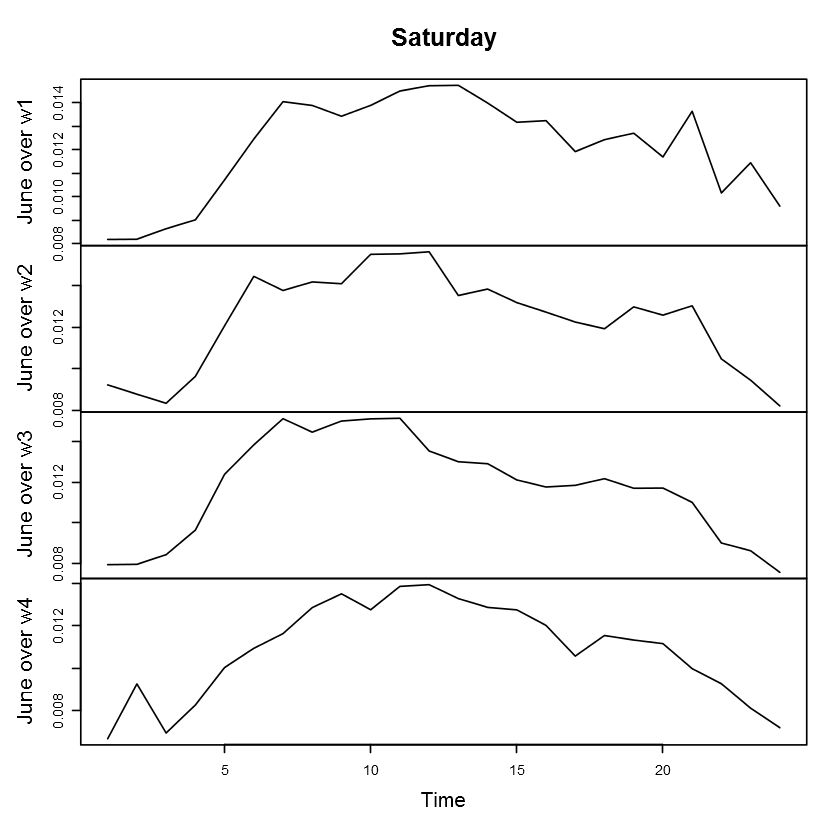

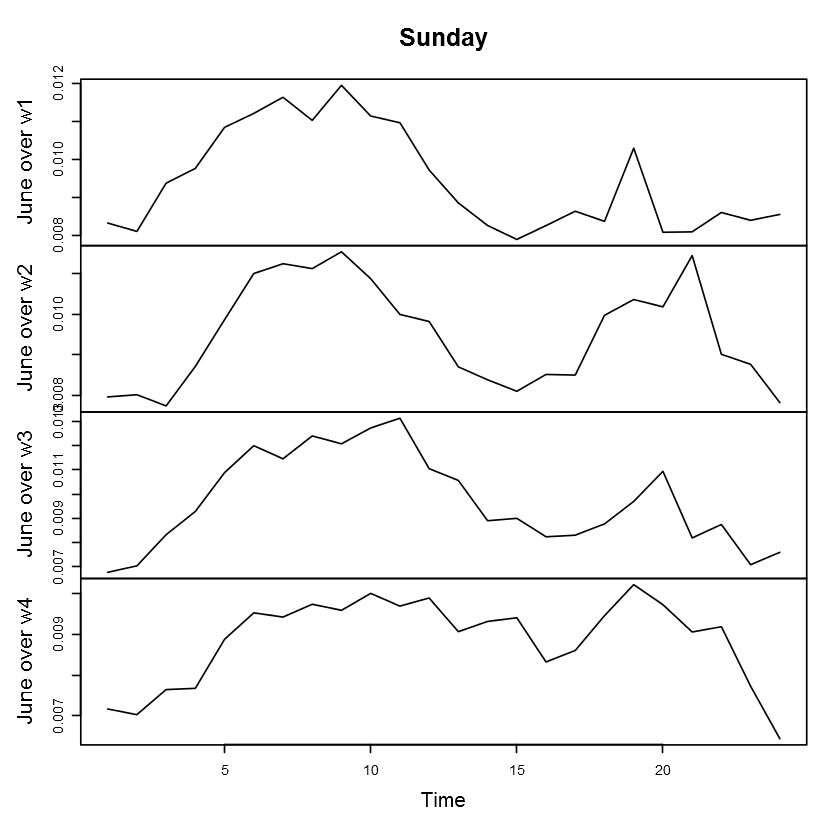

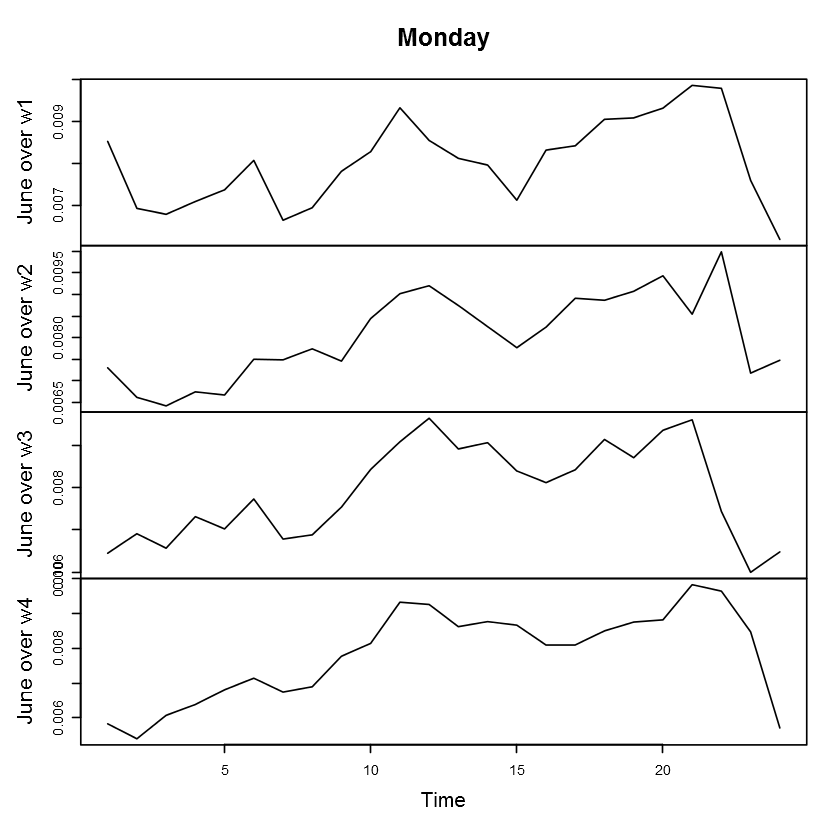

In [88]:
for (weekday in 1:7){
    over_month = data.frame(june_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4')
    plot.ts(over_month, main=weekdays[weekday])
}